# K-Means Clustering & DBSCAN Clustering

In [1]:
# import Libraries
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

## Import Dataset

In [2]:
# Import the dataset from csv file
df = pd.read_csv('data/cluster2.csv')
print("Dimensions of the data = {}".format(df.shape))
df[:5]

Dimensions of the data = (1300, 2)


,X,Y
0,1.070487,1.328147
1,1.072777,1.191249
2,0.328029,1.261713
3,0.600926,1.254465
4,0.759281,1.284541


## Preprocessing

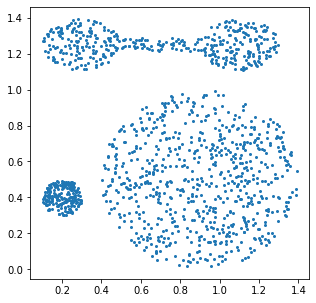

In [3]:
# convert df to array
X = df.values

# Set the size of the figure
plt.figure(figsize=(5,5))

# Plot the data points
plt.scatter(X[:,0], X[:,1],s=4)

plt.show() # print the figure

# K-Means Clustering

---------0---------
Cluster Centers
[[0.73819411 0.44129477]
 [0.73235322 1.19932188]]


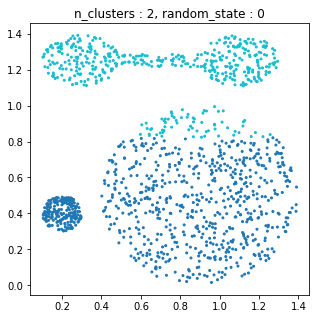

---------1---------
Cluster Centers
[[1.03907732 0.46269783]
 [0.37652041 0.42663859]
 [0.71874017 1.20590574]]


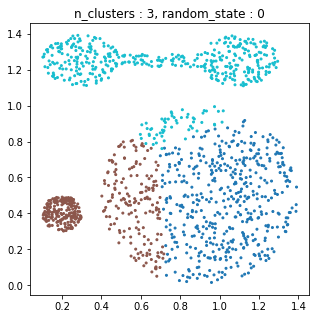

---------2---------
Cluster Centers
[[0.37933677 0.43852558]
 [1.03377029 0.43895496]
 [0.34776242 1.24967736]
 [1.01752739 1.15469238]]


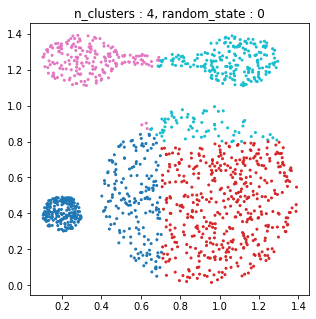

---------3---------
Cluster Centers
[[1.05990326 1.24442537]
 [0.96865868 0.2724487 ]
 [0.98937788 0.71036878]
 [0.32740264 0.44105235]
 [0.35065704 1.25471922]]


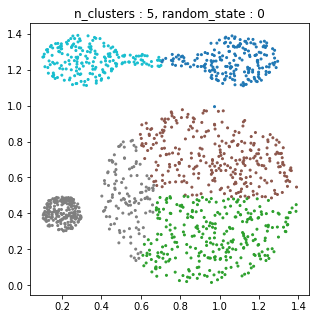

In [4]:
# K-Means Clustering
from sklearn.cluster import KMeans

# color-map
cmap = "tab10" 

for i, (n_clusters, random_state) in enumerate(((2,0),(3,0),(4,0),(5,0))) :
    k_means = KMeans(n_clusters = n_clusters, random_state = random_state)
    y_pred = k_means.fit_predict(X)
    print(f"---------{i}---------")
    print("Cluster Centers")
    print(k_means.cluster_centers_)
    plt.figure(i+1,figsize=(5,5))
    plt.scatter(X[:,0],X[:,1],cmap=cmap, s=4, c=y_pred)
    # 'c' : The color of each point
    plt.title("n_clusters : {}, random_state : {}".format(n_clusters, random_state))
    plt.show()

# n_clusters : the number of clusters
# random_state : the random seed for centroid initialization
# max_iter : maximum number of iterations

# DBSCAN Clustering

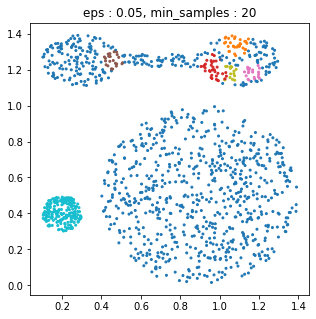

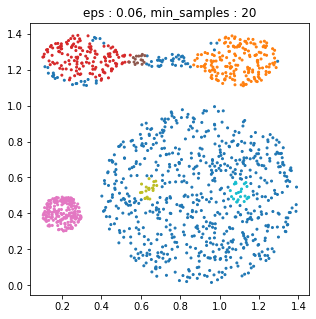

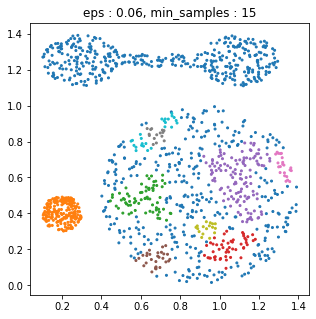

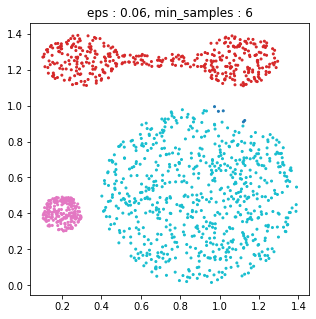

In [5]:
## DBSCAN
from sklearn.cluster import DBSCAN

for i, (eps,min_samples) in enumerate(
        ((0.05,20),(0.06,20),(0.06,15),(0.06,6))) :
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    y_pred = dbscan.fit_predict(X) ## Outliers are indexed as -1
    plt.figure(i+1,figsize=(5,5))
    plt.scatter(X[:,0],X[:,1],cmap=cmap,s=4,c=y_pred)
    plt.title("eps : {}, min_samples : {}".format(eps,min_samples))
    plt.show()

### dbscan parameters
## eps : Maximum radius of the neighborhood
## min_samples : The number of points in a neighborhood to be a core point
## metric : the distance metric (default : "euclidean")

### plot
## Outliers are colored by blue